# Problem
* To predict the sales price for each house. 
* For each Id in the test set, you must predict the value of the SalePrice variable. 

# 1. Loading and Data Eyeballing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

train_df  = pd.read_csv('/kaggle/input/house-prices-regression-techniques/train.csv')
test_df = pd.read_csv('/kaggle/input/house-prices-regression-techniques/test.csv')

# Displaying the first few rows of the training dataset
print("Training Data:")
print(train_df.head())
print("---------------------------------------------------------------------")
# Displaying the first few rows of the test dataset
print("\n\nTest Data:")
print(test_df.head())

Training Data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   20

# 2. Data Cleaning and PreProcessing

## 2.1. Handling Missing Values

In [2]:
# Checking for missing values in the training dataset
missing_values_train = train_df.isnull().sum()
missing_values_train = missing_values_train[missing_values_train > 0]
print("Missing values in the training dataset:")
print(missing_values_train)

# Checking for missing values in the test dataset
missing_values_test = test_df.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0]
print("\nMissing values in the test dataset:")
print(missing_values_test)

Missing values in the training dataset:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Missing values in the test dataset:
MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageF

In [3]:
import pandas as pd

# Load data
train = pd.read_csv('/kaggle/input/house-prices-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-regression-techniques/test.csv')
# Handling missing values in train set
train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace=True)
train['Alley'].fillna("None", inplace=True)
train['MasVnrType'].fillna(train['MasVnrType'].mode()[0], inplace=True)
train['MasVnrArea'].fillna(0, inplace=True)
train['BsmtQual'].fillna("None", inplace=True)
train['BsmtCond'].fillna("None", inplace=True)
train['BsmtExposure'].fillna("None", inplace=True)
train['BsmtFinType1'].fillna("None", inplace=True)
train['BsmtFinType2'].fillna("None", inplace=True)
train['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)
train['FireplaceQu'].fillna("None", inplace=True)
train['GarageType'].fillna(train['GarageType'].mode()[0], inplace=True)
train['GarageYrBlt'].fillna(0, inplace=True)
train['GarageFinish'].fillna("None", inplace=True)
train['GarageQual'].fillna("None", inplace=True)
train['GarageCond'].fillna("None", inplace=True)
train['PoolQC'].fillna("None", inplace=True)
train['Fence'].fillna("None", inplace=True)
train['MiscFeature'].fillna("None", inplace=True)

# Handling missing values in test set
test['MSZoning'].fillna(test['MSZoning'].mode()[0], inplace=True)
test['LotFrontage'].fillna(test['LotFrontage'].median(), inplace=True)
test['Alley'].fillna("None", inplace=True)
test['Utilities'].fillna(test['Utilities'].mode()[0], inplace=True)
test['Exterior1st'].fillna(test['Exterior1st'].mode()[0], inplace=True)
test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0], inplace=True)
test['MasVnrType'].fillna(test['MasVnrType'].mode()[0], inplace=True)
test['MasVnrArea'].fillna(0, inplace=True)
test['BsmtQual'].fillna("None", inplace=True)
test['BsmtCond'].fillna("None", inplace=True)
test['BsmtExposure'].fillna("None", inplace=True)
test['BsmtFinType1'].fillna("None", inplace=True)
test['BsmtFinSF1'].fillna(0, inplace=True)
test['BsmtFinType2'].fillna("None", inplace=True)
test['BsmtFinSF2'].fillna(0, inplace=True)
test['BsmtUnfSF'].fillna(0, inplace=True)
test['TotalBsmtSF'].fillna(0, inplace=True)
test['BsmtFullBath'].fillna(0, inplace=True)
test['BsmtHalfBath'].fillna(0, inplace=True)
test['KitchenQual'].fillna(test['KitchenQual'].mode()[0], inplace=True)
test['Functional'].fillna(test['Functional'].mode()[0], inplace=True)
test['FireplaceQu'].fillna("None", inplace=True)
test['GarageType'].fillna(test['GarageType'].mode()[0], inplace=True)
test['GarageYrBlt'].fillna(0, inplace=True)
test['GarageFinish'].fillna("None", inplace=True)
test['GarageCars'].fillna(0, inplace=True)
test['GarageArea'].fillna(0, inplace=True)
test['GarageQual'].fillna("None", inplace=True)
test['GarageCond'].fillna("None", inplace=True)
test['PoolQC'].fillna("None", inplace=True)
test['Fence'].fillna("None", inplace=True)
test['MiscFeature'].fillna("None", inplace=True)
test['SaleType'].fillna(test['SaleType'].mode()[0], inplace=True)

# Verify that there are no more missing values
print("Missing values in train set after filling:")
print(train.isnull().sum().sum())

print("\nMissing values in test set after filling:")
print(test.isnull().sum().sum())


Missing values in train set after filling:
0

Missing values in test set after filling:
0


## 2.2. Item Weight Distribution

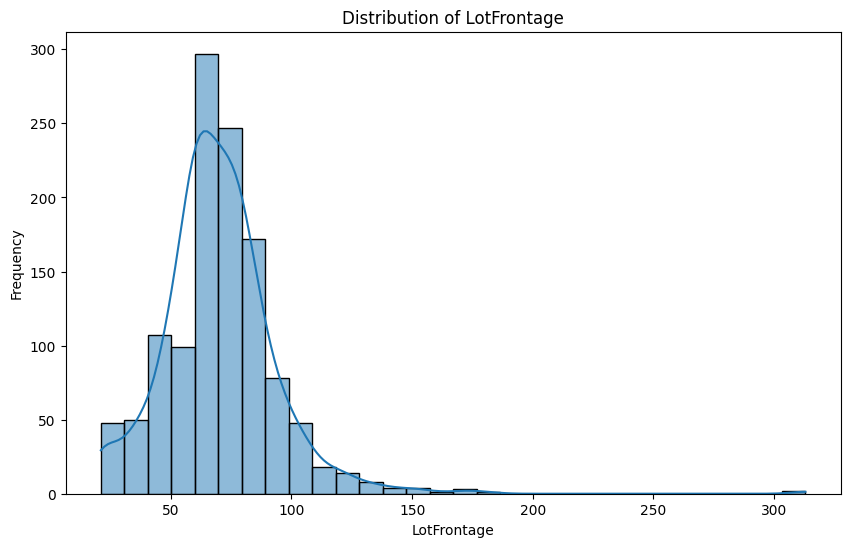

In [4]:
# Visualizing the distribution of LotFrontage
plt.figure(figsize=(10, 6))
sns.histplot(train_df['LotFrontage'], kde=True, bins=30)
plt.title('Distribution of LotFrontage')
plt.xlabel('LotFrontage')
plt.ylabel('Frequency')
plt.show()

## 2.3. Item Visibility Distribution

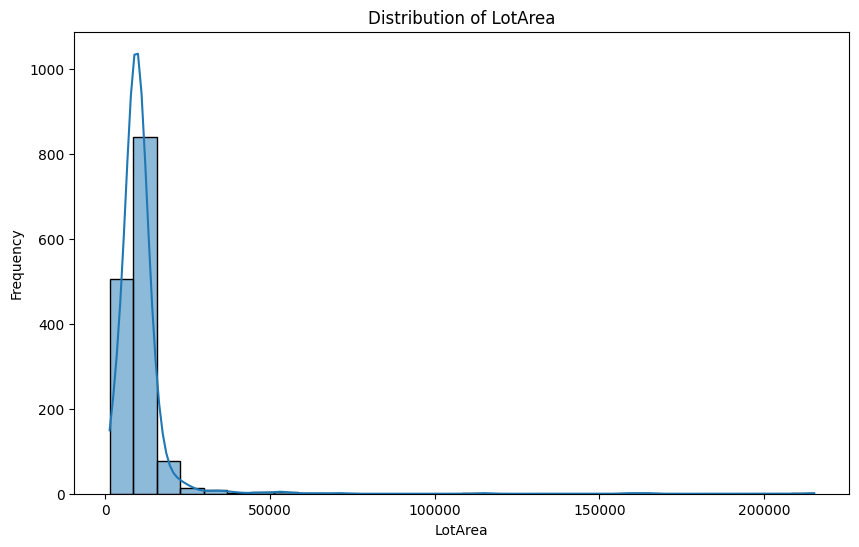

In [5]:
# Visualizing the distribution of LotArea
plt.figure(figsize=(10, 6))
sns.histplot(train_df['LotArea'], kde=True, bins=30)
plt.title('Distribution of LotArea')
plt.xlabel('LotArea')
plt.ylabel('Frequency')
plt.show()

## 2.4. Encoding the categorical features

In [6]:
categorical_cols = [col for col in train.columns if train[col].dtype == "object"]
numerical_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]

# Exclude target column from features
numerical_cols.remove('SalePrice')

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
def build_model(model):
    return Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# 3. Model Building 
## 3.1. Feature Matrix creation

In [7]:
X = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']
X_test = test.copy()

In [8]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,0,None,MnPrv,None,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,4,2010,WD,Normal


In [9]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

## 3.2. Data Standardization

In [10]:
# Standardize numerical features
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('SalePrice')

scaler = StandardScaler()

# Fit and transform the train set
train[numerical_features] = scaler.fit_transform(train[numerical_features])

# Transform the test set
common_numerical_features = numerical_features.intersection(test.columns)
test[common_numerical_features] = scaler.transform(test[common_numerical_features])

# Verify the standardization (mean should be close to 0 and std should be close to 1)
print("\nTrain set numerical features mean after standardization:")
print(train[numerical_features].mean())

print("\nTrain set numerical features std after standardization:")
print(train[numerical_features].std())


Train set numerical features mean after standardization:
Id               0.000000e+00
MSSubClass      -8.455945e-17
LotFrontage      2.798370e-16
LotArea         -5.840077e-17
OverallQual      1.387018e-16
OverallCond      3.540547e-16
YearBuilt        1.046347e-15
YearRemodAdd     4.496860e-15
MasVnrArea      -3.893385e-17
BsmtFinSF1      -2.433366e-17
BsmtFinSF2      -3.406712e-17
BsmtUnfSF       -6.600504e-17
TotalBsmtSF      2.457699e-16
1stFlrSF         6.509253e-17
2ndFlrSF        -1.825024e-17
LowQualFinSF     1.216683e-17
GrLivArea       -1.277517e-16
BsmtFullBath     2.311697e-17
BsmtHalfBath     2.433366e-17
FullBath         1.180182e-16
HalfBath         2.083569e-17
BedroomAbvGr     2.141362e-16
KitchenAbvGr     4.501726e-16
TotRmsAbvGrd    -1.022014e-16
Fireplaces      -4.866731e-18
GarageYrBlt      1.764190e-16
GarageCars       1.216683e-16
GarageArea      -1.216683e-17
WoodDeckSF       5.596741e-17
OpenPorchSF      3.041707e-17
EnclosedPorch   -2.311697e-17
3SsnPorch   

## 3.3. Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(X.shape, X_train.shape, X_valid.shape)

(1460, 80) (1168, 80) (292, 80)


In [13]:
print(y.shape, y_train.shape, y_valid.shape)

(1460,) (1168,) (292,)


## 3.4. Model Comparison

In [14]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

results = {}
for name, model in models.items():
    model_pipeline = build_model(model)
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    results[name] = rmse

# Print the results
for name, rmse in results.items():
    print(f"{name}: RMSE = {rmse}")

# Select the best model
best_model_name = min(results, key=results.get)
best_model = build_model(models[best_model_name])

# Retrain the best model on the full training set
best_model.fit(X, y)

# Make predictions on the test set
test_preds = best_model.predict(X_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': test_preds
})

submission.to_csv('submission.csv', index=False)

Linear Regression: RMSE = 65431.980889467246
Ridge Regression: RMSE = 29801.51170659382
Lasso Regression: RMSE = 29780.525296243024
Random Forest: RMSE = 28881.5568187207
Gradient Boosting: RMSE = 27516.049096942872


# 4. Visual Insights

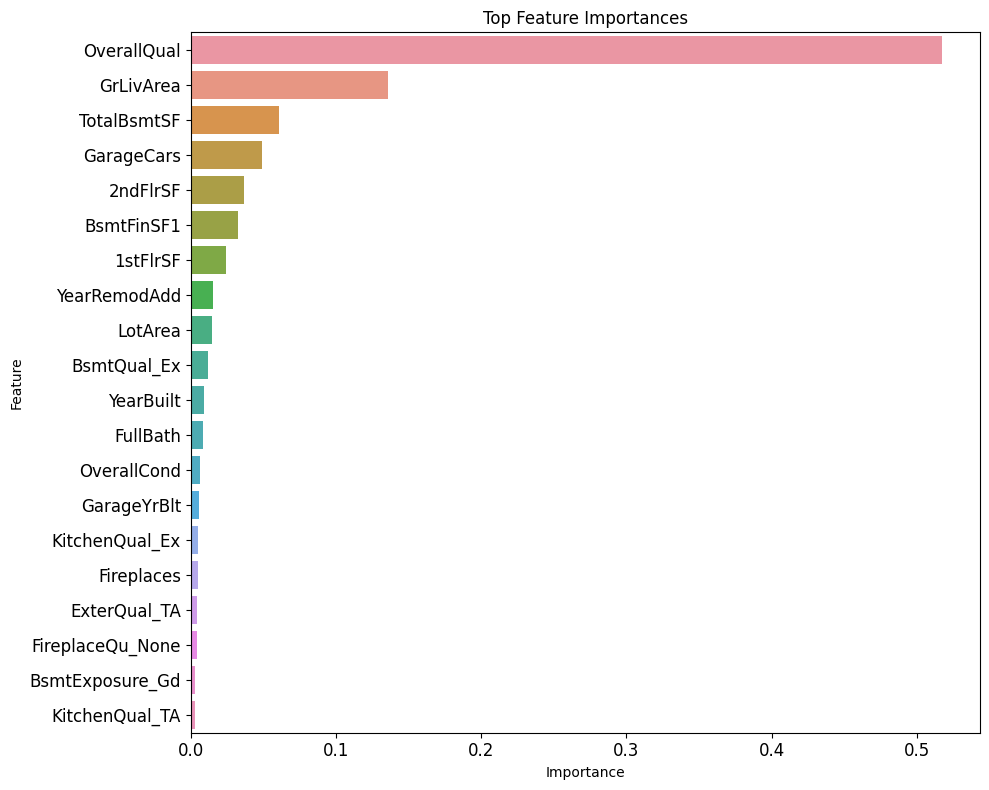

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Visual Insights: Feature Importance Plot for the Best Model (if it supports it)
if hasattr(best_model.named_steps['model'], 'feature_importances_'):
    importances = best_model.named_steps['model'].feature_importances_
    features = numerical_cols + list(best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols))
    feature_importances = pd.Series(importances, index=features).sort_values(ascending=False)

    top_n = 20  # Number of top features to display
    top_features = feature_importances.head(top_n)

    plt.figure(figsize=(10, 8))  # Increase figure size for better readability
    sns.barplot(x=top_features, y=top_features.index)
    plt.title('Top Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

# 5. Inference
* **Model Evaluation** :  
Based on the RMSE results, we can identify which model performed best. For example, if Gradient Boosting had the lowest RMSE, it indicates this model captured the underlying patterns in the data better than the others.
* **Feature Importance** :     
The feature importance plot provides insights into which features contributed most to the model's predictions. Features with higher importance scores had a stronger influence on predicting house prices.

* **Observations and Conclusions** :     
1. Model Performance: Gradient Boosting and Random Forest likely performed best due to their ability to handle complex relationships and interactions between features.
2. Key Features: Features such as OverallQual (overall quality of the house), GrLivArea (above ground living area), and GarageCars (number of cars in the garage) are crucial in predicting house prices. This aligns with real estate domain knowledge where the quality and size of the living space significantly impact house prices.
3. Data Handling: Proper handling of missing values and categorical encoding is essential for model performance. Incorrect handling can lead to biased or inaccurate models.

 

